(52, 512)
(512,)
25-03-23 09:07:47 - diff person
25-03-23 09:07:47 - (27.682348, 23.56)
novel image, save it on DB


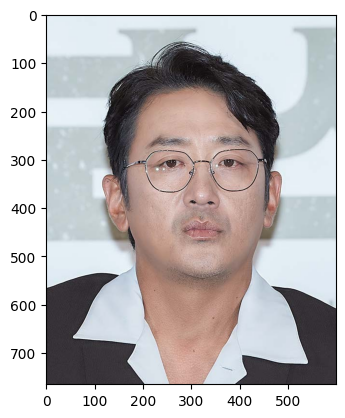

In [ ]:
import base64
import cv2
import numpy as np
from PIL import Image
from firebase_ops import *
from crud_test import *
import requests
from io import BytesIO

url = "https://entertainimg.kbsmedia.co.kr/cms/uploads/PERSON_20230912102308_f1332a5bdc2bed766b845eb30586fb90.jpg"
response = requests.get(url)

if response.status_code == 200:
    img = np.array(Image.open(BytesIO(response.content)))
else:
    print("error")
entity = write_sample(img_path=img)
is_same, user = is_sim0(entity['embedding'])
if is_same:
    img_bytes = base64.b64decode(user['image'])

    img_array = np.frombuffer(img_bytes, dtype=np.uint8)

    image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

    plt.imshow(image)
else:
    print("novel image, save it on DB")
    plt.tight_layout()
    plt.imshow(img)


(52, 512)
(512,)
25-03-23 09:07:15 - persion exist
25-03-23 09:07:15 - (14.116761, 23.56)


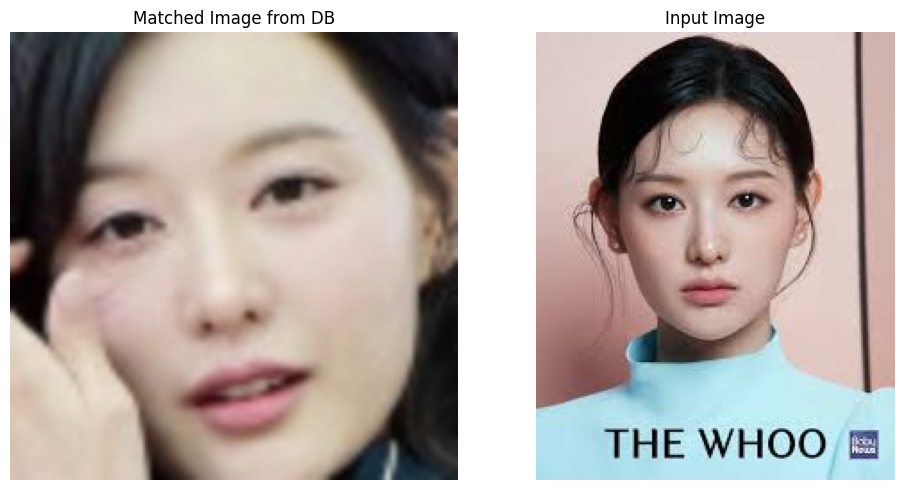

In [8]:
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTDveiF3-m3pxUU_-iAut7T3wCHUEOma--2GQ&s"
response = requests.get(url)

if response.status_code == 200:
    img = np.array(Image.open(BytesIO(response.content)))
else:
    print("error")
entity = write_sample(img_path=img)
is_same, user = is_sim0(entity['embedding'])
if is_same:
    img_bytes = base64.b64decode(user['image'])
    img_array = np.frombuffer(img_bytes, dtype=np.uint8)
    image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # 왼쪽: DB에 있던 이미지
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Matched Image from DB")
    axes[0].axis("off")

    # 오른쪽: 현재 입력 이미지
    axes[1].imshow(img)
    axes[1].set_title("Input Image")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()
else:
    print("novel image, save it on DB")
    plt.imshow(img)
